<a href="https://colab.research.google.com/github/fduartej/python_covid_trabajo_final/blob/main/CovidNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Inicial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import geopandas as gpd


centro_vacunacion = pd.read_csv('TB_CENTRO_VACUNACION.csv',delimiter=",")
centro_vacunacion.head()

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess
0,557,993,"Estacionamiento Del Centro Comercial ""el Quind...",-14.074283,-75.739709,C.S. LOS AQUIJES,0
1,558,993,Estacionamiento Del Centro Comercial Plaza Sol,-14.069467,-75.727896,C.S. LA PALMA,0
2,559,995,Ie 22511,-14.114718,-75.675898,C.S. LOS AQUIJES,0
3,560,998,Ie. Victor Manuel Maurtua,-14.048166,-75.707636,C.S. PARCONA,0
4,561,1000,Primera Loza De La Expansión Urbana,-13.969434,-75.772475,C.S. SAN JUAN BAUTISTA,0


In [43]:
ubigeo = pd.read_csv('TB_UBIGEOS.csv',delimiter=",")
ubigeo.head()

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375


In [44]:
ubigeo_subset = ubigeo[["id_ubigeo", "departamento"]]
ubigeo_subset.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


In [45]:
option = st.selectbox('Selecciona el departamento:',('AMAZONAS','ANCASH','APURIMAC','AREQUIPA','AYACUCHO','CAJAMARCA','CALLAO','CUSCO','HUANCAVELICA','HUANUCO','ICA','JUNIN','LA LIBERTAD','LAMBAYEQUE','LIMA','LORETO','MADRE DE DIOS','MOQUEGUA','PASCO','PIURA','PUNO','SAN MARTIN','TACNA','TUMBES','UCAYALI'))

In [46]:
st.write('Seleccionó:', option)


In [47]:
opcion = "TACNA"
print(opcion)

TACNA


Merge ubigeo y centro de vacunacion

In [48]:
centro_vacunacion_all=pd.merge(centro_vacunacion,ubigeo_subset,on='id_ubigeo')
centro_vacunacion_all.head()

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess,departamento
0,557,993,"Estacionamiento Del Centro Comercial ""el Quind...",-14.074283,-75.739709,C.S. LOS AQUIJES,0,ICA
1,558,993,Estacionamiento Del Centro Comercial Plaza Sol,-14.069467,-75.727896,C.S. LA PALMA,0,ICA
2,767,993,Colegio 23007 Judith Aybar De Granados,-14.058436,-75.730435,C.S. LA PALMA,0,ICA
3,768,993,"Polideportivo Club Del Pueblo ""vacunacar""",-14.077971,-75.731405,HOSPITAL FELIX TORREALVA,0,ICA
4,103356,993,REGIONAL DE ICA,-14.073575,-75.743367,NaN,3356,ICA


Geopandas Peru

In [49]:
# 
provinces_geojson = gpd.read_file("peru_provincial_simple.geojson")
provinces_geojson.head()

,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
0,9,0301,ABANCAY,APURIMAC,LEY,S/N,28/12/1961,21/11/1893,3.458273e+05,345827.34,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4..."
1,8,0902,ACOBAMBA,HUANCAVELICA,LEY,5292,23/11/1925,23/11/1925,9.263674e+04,92636.74,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8..."
2,7,0802,ACOMAYO,CUSCO,LEY,S/N,11/11/1964,02/01/1857,9.328581e+04,93285.81,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1..."
3,5,0202,AIJA,ANCASH,LEY,8188,21/12/1907,05/03/1936,6.963963e+04,69639.63,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763..."
4,6,1602,ALTO AMAZONAS,LORETO,LEY,S/N,08/09/1964,02/01/1857,1.917213e+06,1917212.66,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751..."


In [50]:
centro_vacunacion_filter = centro_vacunacion_all[(centro_vacunacion_all.departamento == opcion)]
centro_vacunacion_filter.head()

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess,departamento
2260,659,1819,I.E. FORTUNATO ZORA CARBAJAL,-17.996100,-70.249200,DIRESA,0,TACNA
2261,102880,1819,ALTO ALIANZA,-17.988230,-70.241685,NaN,2880,TACNA
2262,102881,1819,LA ESPERANZA,-17.994172,-70.248570,NaN,2881,TACNA
2263,102882,1819,JUAN VELASCO ALVARADO,-17.990162,-70.251122,NaN,2882,TACNA
2264,102922,1819,RAMON COPAJA,-17.995345,-70.256969,NaN,2922,TACNA


In [51]:
centro_vacunacion_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 2260 to 27880
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_centro_vacunacion  600 non-null    int64  
 1   id_ubigeo             600 non-null    int64  
 2   nombre                600 non-null    object 
 3   latitud               600 non-null    float64
 4   longitud              600 non-null    float64
 5   entidad_administra    10 non-null     object 
 6   id_eess               600 non-null    int64  
 7   departamento          600 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 42.2+ KB


2260
I.E. FORTUNATO ZORA CARBAJAL -70.2492 -17.9961 DIRESA
2261
ALTO ALIANZA -70.2416848 -17.98823036 nan
2262
LA ESPERANZA -70.24856963 -17.99417176 nan
2263
JUAN VELASCO ALVARADO -70.25112163 -17.99016244 nan
2264
RAMON COPAJA -70.25696903 -17.99534527 nan
2265
CONSULTORIO ODONTOLOGICO "DENTAL LUZ" 0.0 0.0 nan
2266
ASOCIACION DE SALUD INTEGRAL PARA LA FAMILIA  ASIFA 0.0 0.0 nan
2267
DR.  CATACORA 0.0 0.0 nan
2268
DENTIMAGEN 0.0 0.0 nan
2269
BIO DENTAL 0.0 0.0 nan
2270
DENTAL PALOMINO 0.0 0.0 nan


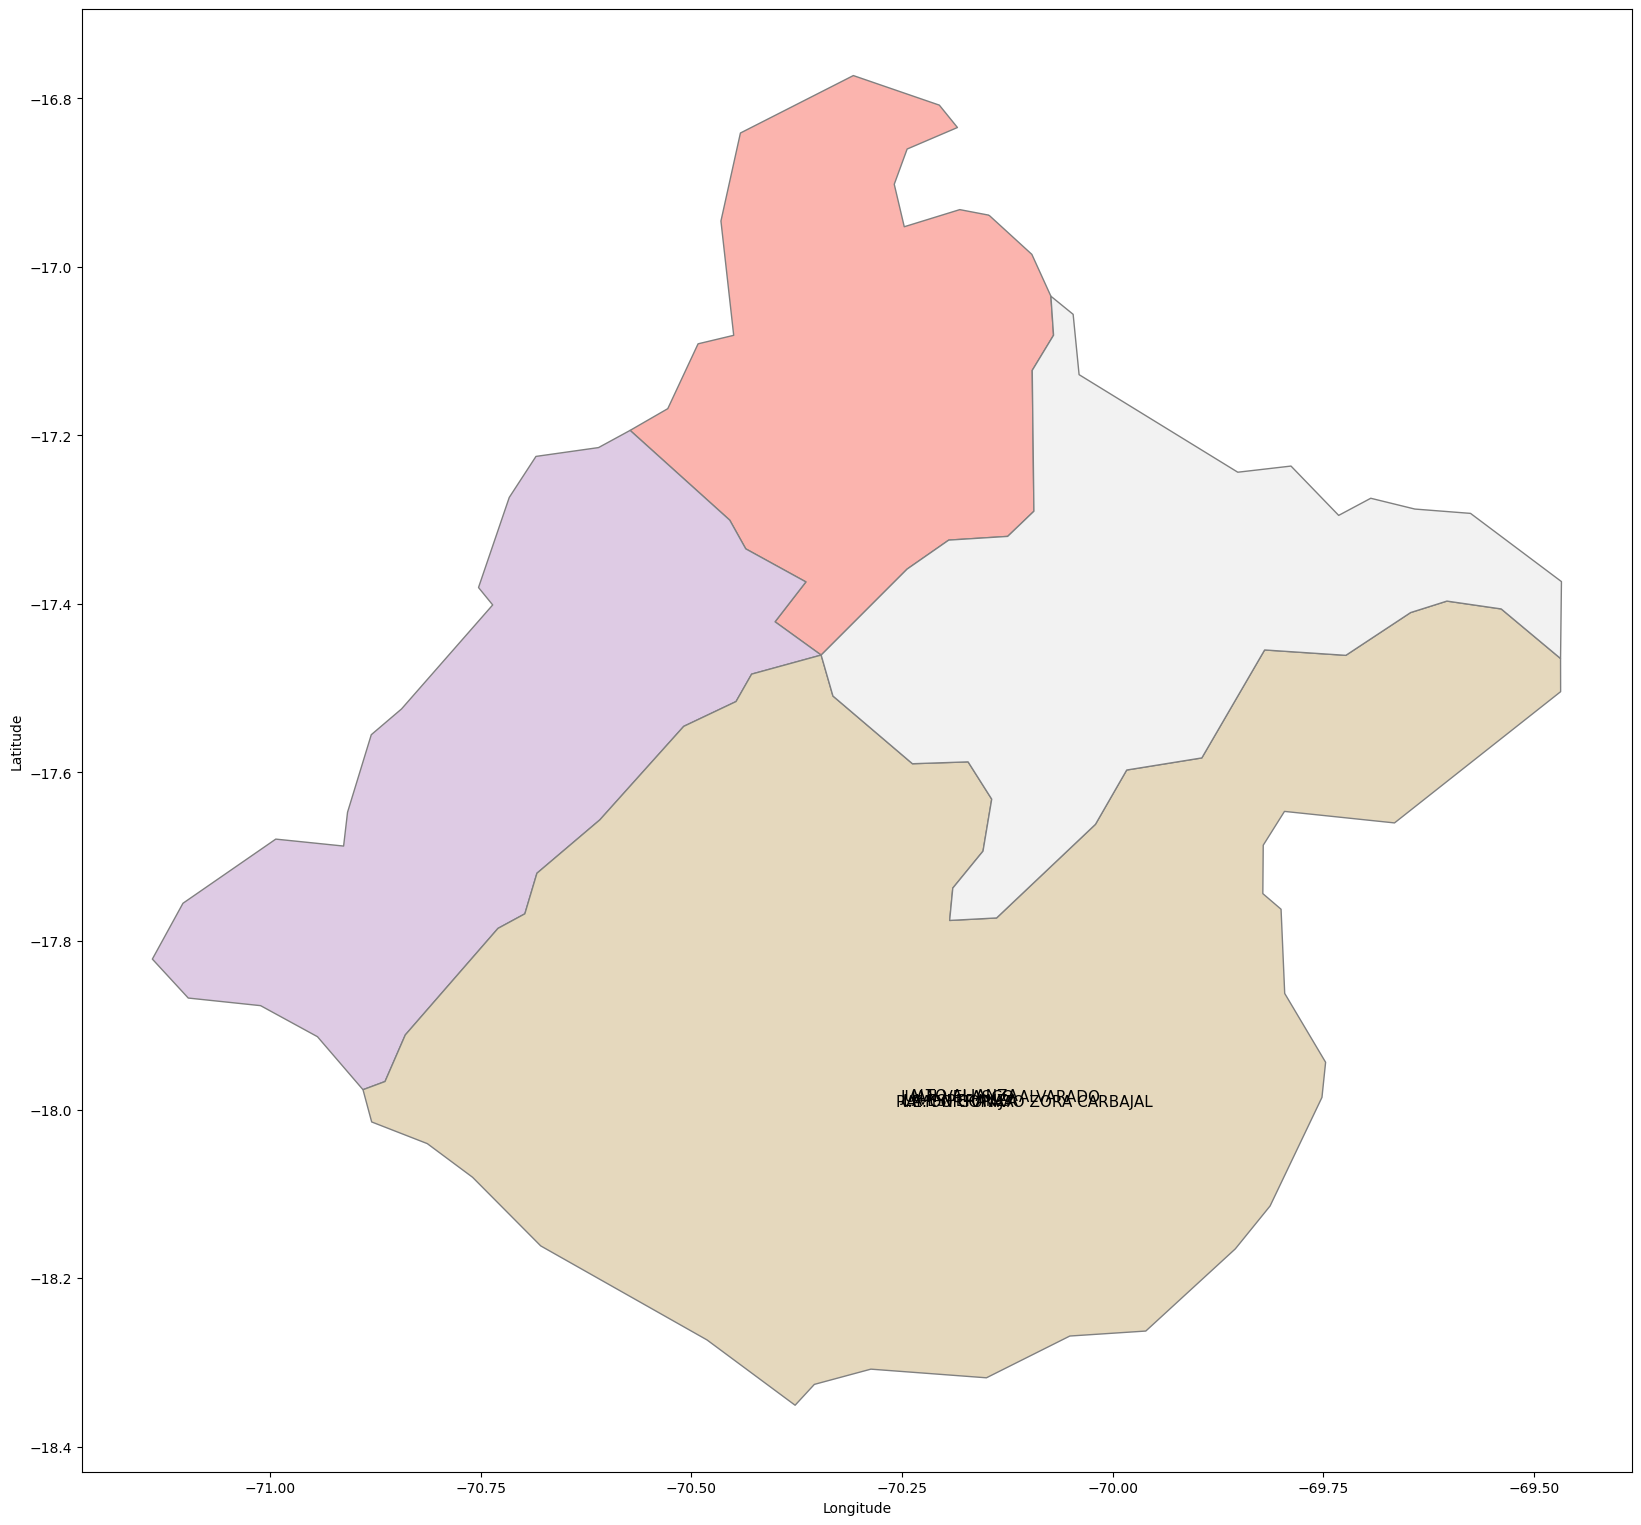

In [73]:
ax = provinces_geojson[provinces_geojson.FIRST_NOMB==opcion].plot(figsize=(20,20),
                                        edgecolor=u'gray', cmap='Pastel1')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
ax.axis('scaled')

i=0
for index, row in centro_vacunacion_filter.iterrows():
    print(index)
    #print(row)
    print(row['nombre'], row['longitud'],row['latitud'],row['entidad_administra'])
    if float(row['longitud'])!=0.0 and float(row['latitud'])!=0.0:
        plt.text(float(row['longitud']),
                float(row['latitud']),
                row['nombre'],
                size=11)
    if i==10:
        break
    i=i+1
    
plt.show()